In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pyart
import scipy

In [21]:
radar = pyart.io.read('/home/zsherman/cmac_test_radar.nc')

/home/zsherman/dev/pyart/pyart/io/cfradial.py:376: RuntimeWarning: invalid value encountered in less
  data = self.ncvar[:]
/home/zsherman/dev/pyart/pyart/io/cfradial.py:376: RuntimeWarning: invalid value encountered in greater
  data = self.ncvar[:]


In [24]:
radar.fields.keys()

dict_keys(['total_power', 'reflectivity', 'velocity', 'spectrum_width', 'differential_reflectivity', 'specific_differential_phase', 'cross_correlation_ratio', 'normalized_coherent_power', 'differential_phase', 'sounding_temperature', 'height', 'SNR', 'velocity_texture', 'gate_id', 'corrected_velocity', 'unfolded_differential_phase', 'corrected_differential_phase', 'filtered_corrected_differential_phase', 'corrected_specific_diff_phase', 'filtered_corrected_specific_diff_phase', 'specific_attenuation', 'attenuation_corrected_reflectivity', 'rain_rate_A'])

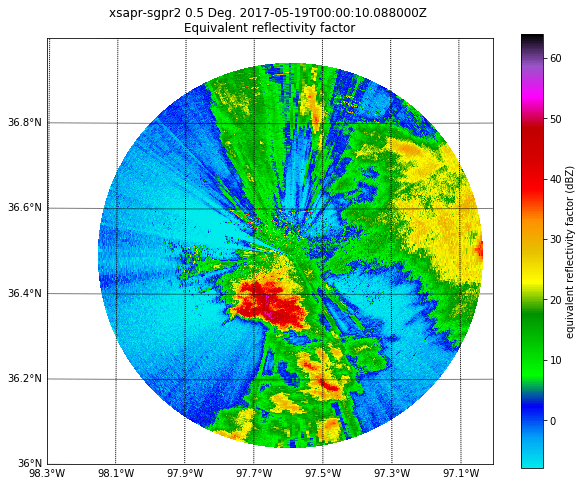

In [25]:
max_lat = 37
min_lat = 36
min_lon = -98.3
max_lon = -97
lal = np.arange(min_lat, max_lat, .2)
lol = np.arange(min_lon, max_lon, .2)

display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize=[10, 8])
display.plot_ppi_map('reflectivity', sweep=0, resolution='c',
                     vmin=-8, vmax=64, mask_outside=False,
                     cmap=pyart.graph.cm.NWSRef,
                     min_lat=min_lat, min_lon=min_lon,
                     max_lat=max_lat, max_lon=max_lon,
                     lat_lines=lal, lon_lines=lol)
# plt.savefig('')

In [26]:
print(radar.fields['gate_id']['notes'])
cat_dict = {}
for pair_str in radar.fields['gate_id']['notes'].split(','):
    print(pair_str)
    cat_dict.update(
        {pair_str.split(':')[1]:int(pair_str.split(':')[0])})

0:multi_trip,1:rain,2:snow,3:no_scatter,4:melting,5:clutter
0:multi_trip
1:rain
2:snow
3:no_scatter
4:melting
5:clutter


In [27]:
happy_gates = pyart.correct.GateFilter(radar)
happy_gates.exclude_all()
happy_gates.include_equal('gate_id', cat_dict['rain'])
happy_gates.include_equal('gate_id', cat_dict['melting'])
happy_gates.include_equal('gate_id', cat_dict['snow'])

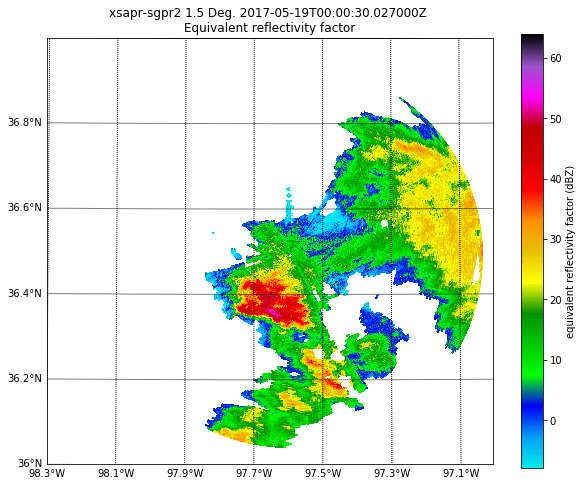

In [28]:
max_lat = 37
min_lat = 36
min_lon = -98.3
max_lon = -97
lal = np.arange(min_lat, max_lat, .2)
lol = np.arange(min_lon, max_lon, .2)

display = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize=[10, 8])
display.plot_ppi_map('reflectivity', sweep=1, resolution='c',
                     vmin=-8, vmax=64, mask_outside=False,
                     cmap=pyart.graph.cm.NWSRef,
                     min_lat=min_lat, min_lon=min_lon,
                     max_lat=max_lat, max_lon=max_lon,
                     lat_lines=lal, lon_lines=lol,
                     gatefilter=happy_gates)
# plt.savefig('')

In [29]:
grids = pyart.map.grid_from_radars(
    (radar, ), grid_shape=(46, 251, 251),
    grid_limits=((0, 15000.0), (-50000, 50000), (-50000, 50000)),
    fields=list(radar.fields.keys()), gridding_algo="map_gates_to_grid",
    weighting_function='BARNES', gatefilters=(happy_gates, ),
    min_radius=200.0)

/home/zsherman/anaconda3/envs/pyart/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:4750: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if fix_wrap_around and itemindex:


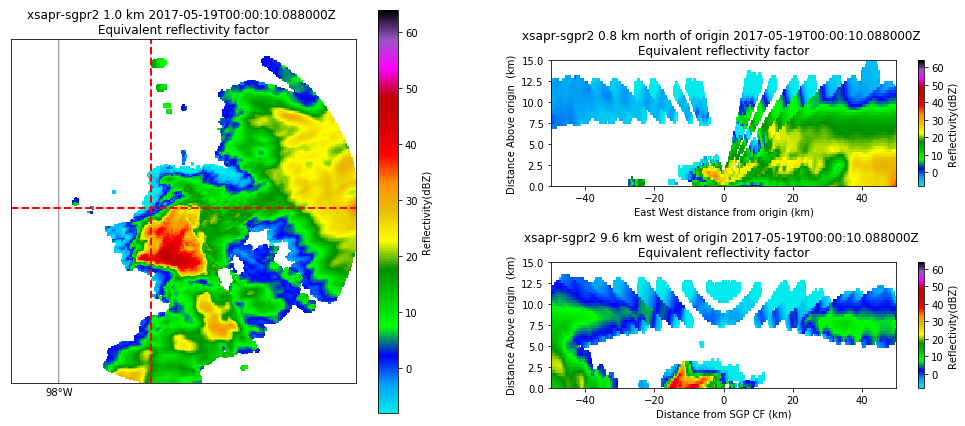

In [30]:
display = pyart.graph.GridMapDisplay(grids)
fig = plt.figure(figsize=[15, 7])

# Panel sizes.
map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

# Parameters.
level = 3
vmin = -8
vmax = 64
lat = 36.5
lon = -97.7

# Panel 1, basemap, radar reflectivity and NARR overlay.
ax1 = fig.add_axes(map_panel_axes)
display.plot_basemap(lon_lines = np.arange(-104, -93, 2))
display.plot_grid('reflectivity', level=level, vmin=vmin, vmax=vmax,
                  cmap=pyart.graph.cm.NWSRef)
display.plot_crosshairs(lon=lon, lat=lat)

# Panel 2, longitude slice.
ax2 = fig.add_axes(x_cut_panel_axes)
display.plot_longitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
                             cmap=pyart.graph.cm.NWSRef)
ax2.set_ylim([0, 15])
ax2.set_xlim([-50, 50])
ax2.set_xlabel('Distance from SGP CF (km)')

# Panel 3, latitude slice.
ax3 = fig.add_axes(y_cut_panel_axes)
ax3.set_ylim([0, 15])
ax3.set_xlim([-50, 50])
display.plot_latitude_slice('reflectivity', lon=lon, lat=lat, vmin=vmin, vmax=vmax,
                            cmap=pyart.graph.cm.NWSRef)
# plt.savefig('')